In [1]:
import yfinance as yf
import pandas as pd

# define the list of Nasdaq stock symbols
tickers =  ['AAPL', 'ADBE', 'ADSK', 'AMAT', 'AMGN', 'AMZN', 'ATVI', 'BBBY', 'BIIB',
       'CDNS', 'CHKP', 'CHRW', 'CMCSA', 'COST', 'CSCO', 'CTAS', 'CTSH', 'DISH',
       'EBAY', 'EXPD', 'EXPE', 'FAST', 'FISV', 'FLEX', 'GILD', 'GOOG', 'GRMN',
       'INTC', 'INTU', 'JNPR', 'KLAC', 'LAMR', 'LBTYA', 'LRCX', 'MCHP', 'MNST',
       'MRVL', 'MSFT', 'NTAP', 'NVDA', 'ORCL', 'PAYX', 'PCAR', 'PDCO', 'PTEN',
       'QCOM', 'ROST', 'SBUX', 'SIRI', 'TEVA', 'URBN', 'VRSN', 'WYNN', 'XRAY']


data = yf.download(tickers, start="2020-04-01",)

# extract the adjusted close prices
adj_close = data['Adj Close']

returns = adj_close.pct_change()

mean_returns = returns.mean() * 252

std_returns = returns.std() * (252 ** 0.5)

cov_matrix = returns.cov() * 252


print('Mean Returns:')
print(mean_returns)

print('Standard Deviation of Returns:')
print(std_returns)

print('Covariance Matrix of Returns:')
print(cov_matrix)


[*********************100%***********************]  54 of 54 completed
Mean Returns:
AAPL     0.386829
ADBE     0.142025
ADSK     0.190741
AMAT     0.427688
AMGN     0.126435
AMZN     0.107624
ATVI     0.180781
BBBY     0.131714
BIIB     0.128865
CDNS     0.451411
CHKP     0.122664
CHRW     0.192729
CMCSA    0.104999
COST     0.233318
CSCO     0.135903
CTAS     0.393547
CTSH     0.170324
DISH    -0.164306
EBAY     0.209879
EXPD     0.221055
EXPE     0.318444
FAST     0.248668
FISV     0.139528
FLEX     0.398318
GILD     0.130833
GOOG     0.266611
GRMN     0.161743
INTC    -0.084944
INTU     0.311130
JNPR     0.224943
KLAC     0.451668
LAMR     0.387579
LBTYA    0.098457
LRCX     0.398024
MCHP     0.394890
MNST     0.263782
MRVL     0.326315
MSFT     0.252700
NTAP     0.243075
NVDA     0.623902
ORCL     0.274545
PAYX     0.256233
PCAR     0.264510
PDCO     0.321020
PTEN     0.922104
QCOM     0.291699
ROST     0.178517
SBUX     0.243707
SIRI     0.000906
TEVA     0.096618
URBN     0.3856

In [2]:
most_negative_cov = cov_matrix.min().min()
most_positive_cov = cov_matrix.max().max()
most_negative_var = cov_matrix.values.diagonal().min()
most_positive_var = cov_matrix.values.diagonal().max()


In [3]:
print(most_negative_cov)

-0.04099053919632671


In [4]:
print(most_positive_cov )

2.349371477314189


In [5]:
min_indices = cov_matrix.unstack().idxmin()
max_indices = cov_matrix.unstack().idxmax()
print(min_indices)
print(max_indices)

('ATVI', 'BBBY')
('BBBY', 'BBBY')


In [6]:
volatility = returns.std()

# calculate the Sharpe ratio of each stock with a risk-free rate of 0.02
sharpe_ratio = (mean_returns - 0.02) / volatility

In [7]:
print('Sharpe Ratio:')
print(sharpe_ratio)

Sharpe Ratio:
AAPL     18.109402
ADBE      5.187475
ADSK      6.652556
AMAT     14.176451
AMGN      7.270801
AMZN      3.623025
ATVI      8.417883
BBBY      1.156994
BIIB      3.232325
CDNS     19.065014
CHKP      6.502900
CHRW      9.493690
CMCSA     4.948834
COST     13.866230
CSCO      7.023990
CTAS     20.034355
CTSH      7.798087
DISH     -5.661218
EBAY      8.750354
EXPD     12.170756
EXPE      9.404066
FAST     14.065792
FISV      6.268667
FLEX     14.695462
GILD      7.130400
GOOG     12.065531
GRMN      8.276387
INTC     -4.603219
INTU     12.192550
JNPR     11.535384
KLAC     15.426843
LAMR     15.296878
LBTYA     3.884957
LRCX     12.461313
MCHP     14.006629
MNST     14.988855
MRVL      9.443119
MSFT     12.457328
NTAP     10.196519
NVDA     18.324796
ORCL     14.633521
PAYX     14.352353
PCAR     15.011117
PDCO     12.436320
PTEN     18.595866
QCOM     10.497545
ROST      6.331945
SBUX     11.941543
SIRI     -1.032598
TEVA      2.650690
URBN     10.309931
VRSN      4.88645

In [8]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
stocks = ['AAPL','AMAT','CDNS','KLAC','PTEN','PCAR']

In [10]:
df = pd.DataFrame()
print(len(stocks))
for stock in stocks:
    df[stock] = pd.read_csv('Nasdaq_ALL_stocks.csv')[stock]

6


In [11]:
df.head()

,AAPL,AMAT,CDNS,KLAC,PTEN,PCAR
0,60.227501,43.299999,65.239998,131.610001,1.89,40.080002
1,61.232498,43.240002,65.930000,132.440002,1.88,40.580002
2,60.352501,42.279999,63.930000,127.940002,1.70,41.073334
3,65.617500,46.150002,69.419998,148.500000,1.93,43.293331
4,64.857498,47.560001,69.050003,147.270004,2.08,43.686668


In [12]:
returns = df.pct_change()

In [13]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [14]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [15]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.020

In [16]:
results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
max_sharpe_idx = np.argmax(results[2])
print(max_sharpe_idx)
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
print(sdp)
print(rp)
max_sharpe = results[2,max_sharpe_idx]
print(max_sharpe)

10652
0.2982112897408781
0.49422672155638436
1.5902373178709954


# Max sharpe ratio is 1.59

In [17]:
weights = weights[max_sharpe_idx]
sum = 0
for i in weights:
    print(i*100)

29.161946319954136
0.6812721860564472
32.880272839886224
1.1280440341972298
21.5196625735899
14.628802046316055


In [19]:
df['portfolio'] = df['AAPL']*weights[0] + df['AMAT']*weights[1] + df['CDNS']*weights[2] + df['KLAC']*weights[3] + df['PTEN']*weights[4] + df['PCAR']*weights[5]

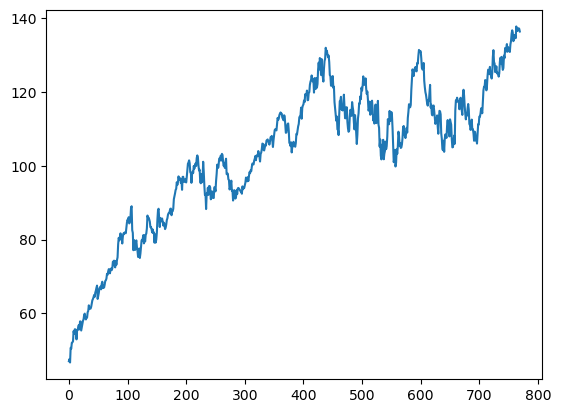

In [20]:
plt.plot(df.index,df['portfolio'])

In [21]:
df1 = df['portfolio']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
def create_dataset(dataset,time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        X.append(a)
        Y.append(dataset[i+time_step,0])
    return np.array(X),np.array(Y)

In [25]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dense, Dropout

model=Sequential()#Stacked LSTM
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(Dropout(0.1))
model.add(LSTM(20))
model.add(Dropout(0.1))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                5680      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 16,301
Trainable params: 16,301
Non-traina

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
8/8 [==============================] - 4s 134ms/step - loss: 0.2510 - val_loss: 0.0615
Epoch 2/30
8/8 [==============================] - 0s 28ms/step - loss: 0.0265 - val_loss: 0.0171
Epoch 3/30
8/8 [==============================] - 0s 31ms/step - loss: 0.0180 - val_loss: 0.0240
Epoch 4/30
8/8 [==============================] - 0s 31ms/step - loss: 0.0138 - val_loss: 0.0328
Epoch 5/30
8/8 [==============================] - 0s 53ms/step - loss: 0.0105 - val_loss: 0.0073
Epoch 6/30
8/8 [==============================] - 0s 36ms/step - loss: 0.0107 - val_loss: 0.0041
Epoch 7/30
8/8 [==============================] - 0s 34ms/step - loss: 0.0078 - val_loss: 0.0103
Epoch 8/30
8/8 [==============================] - 0s 34ms/step - loss: 0.0065 - val_loss: 0.0111
Epoch 9/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0068 - val_loss: 0.0057
Epoch 10/30
8/8 [==============================] - 0s 34ms/step - loss: 0.0064 - val_loss: 0.0056
Epoch 11/30
8/8 [===========

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 9ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

97.73035634557225
114.94724136954773


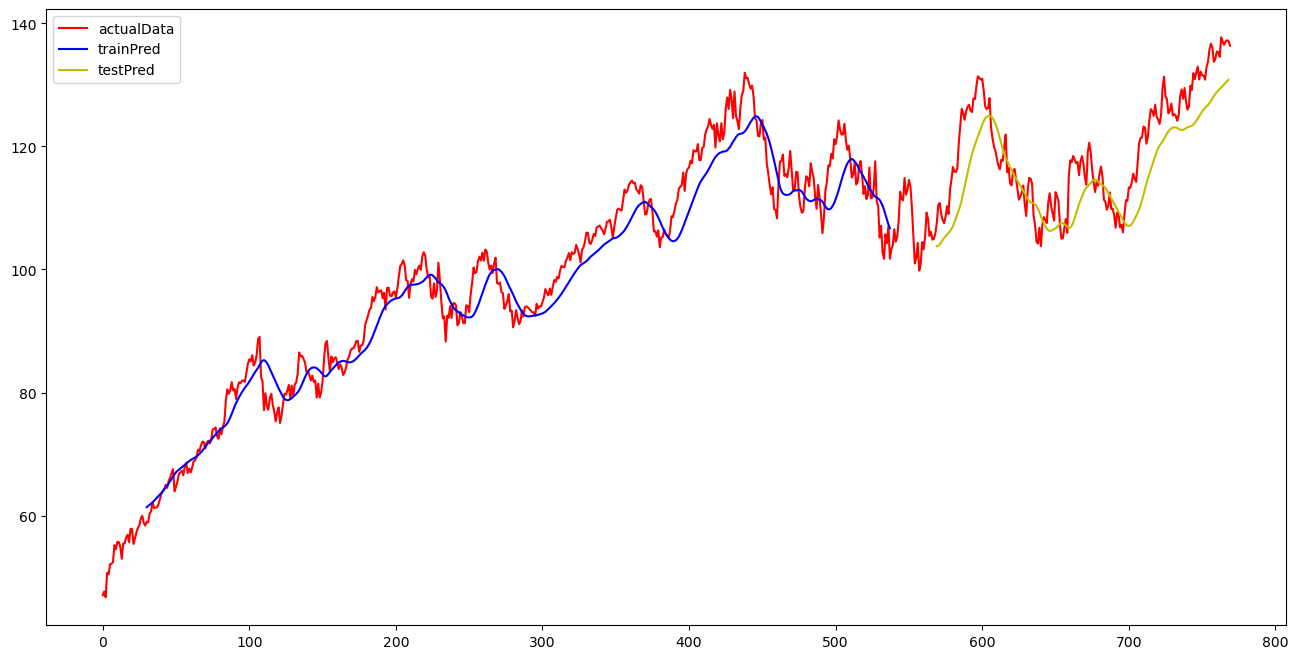

In [32]:
look_back = 30
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2+1:len(df1)-1,:] = test_predict
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df1),label='actualData',color='red')
plt.plot(trainPredictPlot,label='trainPred',color='b')
plt.plot(testPredictPlot,label='testPred',color='y')
plt.legend()
plt.show()

In [33]:
len(test_data)
len(df1)

770

In [34]:
x_input = test_data[201:].reshape(1,-1)
temp_input=list(x_input)
print(temp_input)
temp_input=temp_input[0].tolist()
print(temp_input)
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<15):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        print(x_input.shape)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[array([0.87076007, 0.87636253, 0.91344957, 0.90592117, 0.935844  ,
       0.92514146, 0.93715629, 0.9475958 , 0.92476103, 0.93855173,
       0.93218302, 0.93170659, 0.92421488, 0.94679796, 0.95619557,
       0.97794473, 0.98861545, 0.98182322, 0.95627691, 0.96100124,
       0.97458933, 0.97341232, 0.96512917, 1.        , 0.99134904,
       0.98648214, 0.99233747, 0.99475531, 0.9930883 , 0.98502024])]
[0.8707600669697041, 0.876362532656671, 0.9134495678394324, 0.9059211699348334, 0.9358440029802525, 0.9251414556420875, 0.9371562895508242, 0.9475958010671596, 0.9247610271598766, 0.9385517261496666, 0.9321830199995514, 0.9317065928606619, 0.9242148839605461, 0.9467979596828536, 0.956195572889495, 0.977944733509955, 0.9886154475646364, 0.9818232173692364, 0.9562769092587656, 0.9610012368936519, 0.974589328869535, 0.9734123205831543, 0.9651291700781822, 0.9999999999999999, 0.9913490407291491, 0.986482142089019, 0.9923374700102928, 0.9947553132465098, 0.9930883025339031, 0.9850202396459652]

In [35]:
day_new=np.arange(1,31)
day_pred=np.arange(31,36)

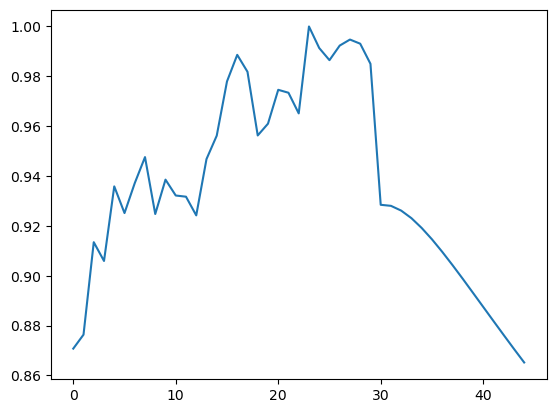

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[740:])

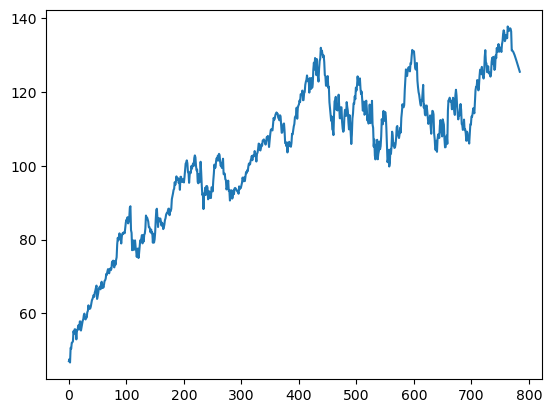

In [37]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)